In [2]:
pip install phe

  Created wheel for phe: filename=phe-1.4.0-py2.py3-none-any.whl size=37362 sha256=0daac80d0c85459b638833d949c37167079e15ea83c04ef4626dd1d05daf7c16
  Stored in directory: /root/.cache/pip/wheels/f8/dc/36/dcb6bf0f1b9907e7b710ace63e64d08e7022340909315fdea4
Successfully built phe


https://stackoverflow.com/questions/54860059/paillier-image-encryption-in-python

# Consider small size images to minimize encryption time.
# 512 * 512 takes hours :)
# 32 * 32 :P

# Demonstration of homomorphism

In [39]:
from phe import paillier
from PIL import Image
import cv2
import PIL
import numpy

public_key, private_key = paillier.generate_paillier_keypair()

l3 = public_key.encrypt(3)
l4 = public_key.encrypt(43)

print(l3, l4)

l7 = l3 - l4

print(private_key.decrypt(l7))

print(l3.ciphertext(be_secure=False))


<phe.paillier.EncryptedNumber object at 0x7f4c5f14df50> <phe.paillier.EncryptedNumber object at 0x7f4c5f14dd10>
-40
21362837353381807567086652204008324475870993558527030424013103838104686428171118849838712982128732304856149174760244126078751051146147909060362174526493199367158990828620837053565689983140524629480255717830669640161953761957115700739803312715484477430886356238150686138035146238961257909853284547609862294977826085550156451133263709007338792732197447411057304116491310858886840955800102479038524280007609910572407278328062261309288795010026180874347924515117635373199425678411682938743811427805094334458257981911155582225711708401245582615585408954806820160506103021685163916901875439187547303881294269385737221501826195237768443167273241273549806594339526689823652008888179282723370427689934518737833524088967748924722473005623200007257019723860705567643653422320828996928138746702591677684430781743356098183223070807072020509120176626342059203304213593046685946857372209260541029580

# Load CV2 from png & resize it to reduce encryption time

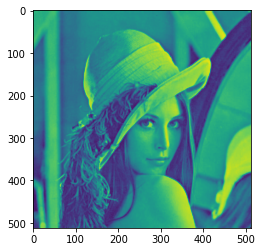

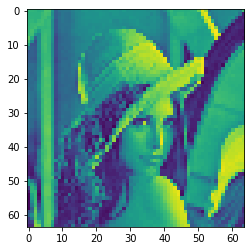

In [99]:
from PIL import Image
import cv2
import PIL
import numpy
from matplotlib import pyplot as plt

openfilename = "greyscale.png"
img2 = cv2.imread(openfilename,0)


def show_img(img):
    plt.imshow(img)
    plt.show()

show_img(img2)

resized_image = cv2.resize(img2, (64, 64)) 

show_img(resized_image)


In [19]:
print(type(resized_image))

<class 'numpy.ndarray'>


In [72]:
print(resized_image)

n, m = resized_image.shape
for i in range(n):
    for j in range(m):
        resized_image[i, j] += 2000

print(resized_image.dtype)


[[157 152 166 ... 122 123 108]
 [157 155 162 ... 127  94  46]
 [158 166 158 ...  89  50  47]
 ...
 [ 50 161 163 ...  91  91  70]
 [111 170 162 ...  71 112  60]
 [ 54 199 160 ... 100  90  53]]
uint8


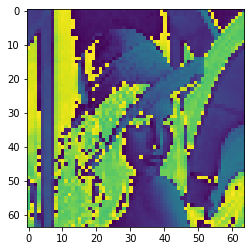

In [42]:
show_img(resized_image)

# Code :P

## Encryption & Decryption functions

In [89]:
from phe import paillier
from PIL import Image
import cv2
import PIL
import numpy

def encrypt_img(img):

    public_key, private_key = paillier.generate_paillier_keypair()

    encrypted_number_list = []

    print(img.shape)

    i = 0

    for row in img:
        i += 1
        # print('row', i)
        l = []
        for col in row:
            l += [public_key.encrypt(int(col))]
        encrypted_number_list += [l]

    encrypted_number_array = numpy.array(encrypted_number_list)

    return encrypted_number_array, public_key, private_key


In [90]:
import numpy as np

def show_encrypted_image(img):
    print('image')
    n, m = img.shape
    
    img_list = []

    for i in range(n):
        col = []
        
        for j in range(m):
            col += [img[i, j].ciphertext(be_secure=False) % 256]
        
        img_list += [col]
    
    x = np.array(img_list, np.uint8)
    print('encrypted image')
    show_img(x)

In [91]:
def decrypt_img(img, public_key, private_key):
    print('image')
    n, m = img.shape
    
    img_list = []

    for i in range(n):
        col = []
        
        for j in range(m):
            col += [private_key.decrypt(img[i, j])]
        
        img_list += [col]
    
    x = np.array(img_list, np.uint8)

    return x

## A. Secure Image Adjustment

In [97]:
def Secure_Image_Adjustment_Brightness_Control(enc_img, v):
    """
    enc_img : encrypted image
    v : encrypted v(brightness changer)
    """
    n, m = enc_img.shape

    for i in range(n):
        for j in range(m):
            enc_img[i, j] += v
    
    return enc_img

In [101]:
def Secure_Image_Adjustment_Image_negation(enc_img, l):
    """
    enc_img : encrypted image
    l : encrypted L(grey levels in the range [0,L−1].)
    """
    n, m = enc_img.shape

    for i in range(n):
        for j in range(m):
            enc_img[i, j] = l - enc_img[i, j]
    
    return enc_img

### Demo

original image


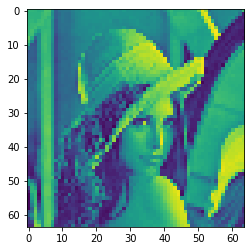

(64, 64)
image
encrypted image


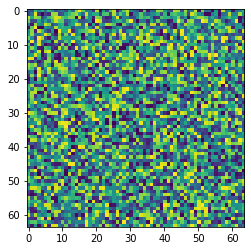

image
decrypted image


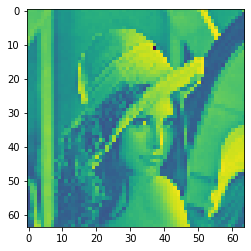

In [100]:
img = resized_image

print('original image')
show_img(img)

enc_img, public_key, private_key = encrypt_img(img)

show_encrypted_image(enc_img)

V = 30
Secure_Image_Adjustment_Brightness_Control(enc_img, public_key.encrypt(V))

dec_img = decrypt_img(enc_img, public_key, private_key)

print('decrypted image')
show_img(dec_img)

original image


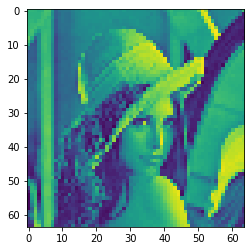

(64, 64)
image
encrypted image


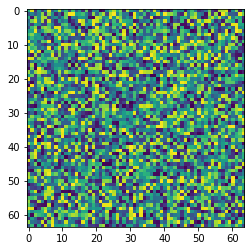

image
decrypted image


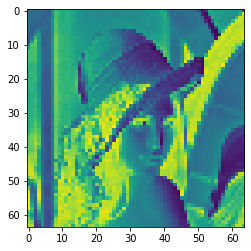

In [102]:
img = resized_image

print('original image')
show_img(img)

enc_img, public_key, private_key = encrypt_img(img)

show_encrypted_image(enc_img)

L = 255
Secure_Image_Adjustment_Image_negation(enc_img, public_key.encrypt(L))

dec_img = decrypt_img(enc_img, public_key, private_key)

print('decrypted image')
show_img(dec_img)